<a href="https://colab.research.google.com/github/connect2rohith/demo-repo/blob/main/YouTube_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
#import json
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
from textblob import TextBlob

##Importing datasets

In [ ]:
#Importing Videos dataset
videos = pd.read_csv(r"/content/drive/MyDrive/Untitled folder/USvideos (1).csv",encoding='utf8',error_bad_lines = False);#opening the file USvideos
videos.head(10)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09
5,cMKX2tE5Luk,The Disaster Artist | Official Trailer HD | A24,A24,1,a24|a24 films|a24 trailers|independent films|t...,1311445,34507,544,3040,https://i.ytimg.com/vi/cMKX2tE5Luk/default.jpg,13.09
6,8wNr-NQImFg,"The Check In: HUD, Ben Carson and Hurricanes",Late Night with Seth Meyers,23,Late night|Seth Meyers|check in|hud|Ben Carson...,666169,9985,297,1071,https://i.ytimg.com/vi/8wNr-NQImFg/default.jpg,13.09
7,_HTXMhKWqnA,iPhone X Impressions & Hands On!,Marques Brownlee,28,iPhone X|iphone x|iphone 10|iPhone X impressio...,1728614,74062,2180,15297,https://i.ytimg.com/vi/_HTXMhKWqnA/default.jpg,13.09
8,_ANP3HR1jsM,ATTACKED BY A POLICE DOG!!,RomanAtwoodVlogs,22,Roman Atwood|Roman|Atwood|roman atwood vlogs|f...,1338533,69687,678,5643,https://i.ytimg.com/vi/_ANP3HR1jsM/default.jpg,13.09
9,zgLtEob6X-Q,Honest Trailers - The Mummy (2017),Screen Junkies,1,screenjunkies|screen junkies|screenjunkies new...,1056891,29943,878,4046,https://i.ytimg.com/vi/zgLtEob6X-Q/default.jpg,13.09


In [ ]:
videos.shape

(7992, 11)

In [ ]:
#importing comments dataset
comm = pd.read_csv(r"/content/drive/MyDrive/Untitled folder/UScomments (1).csv",encoding='utf8',error_bad_lines=False);#opening the file UScomments
comm.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


##Finding polarities

Making the BOB classifier and using it to test the sentiments of the sentence

In [ ]:
pol=[] # list which will contain the polarity of the comments
for i in comm.comment_text.values:
    try:
        analysis =TextBlob(i)
        pol.append(analysis.sentiment.polarity)  # give values between <0, 0 or >0
        
    except:
        pol.append(0)

In [ ]:
pol

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.8,
 -0.13571428571428573,
 0.0,
 0.2,
 -0.023333333333333352,
 0.5,
 0.0,
 0.8,
 -0.2916666666666667,
 0.0,
 0.25,
 -0.8,
 0.0,
 0.0,
 0.65,
 0.0,
 0.375,
 0.0,
 0.0,
 0.5,
 -0.04999999999999999,
 0.34448051948051944,
 0.5,
 0.6,
 0.0,
 0.0,
 -0.30625,
 0.28828125,
 -0.36458333333333337,
 0.5,
 0.012499999999999997,
 0.11904761904761905,
 0.16666666666666666,
 0.0,
 -0.4,
 -0.125,
 -0.07142857142857142,
 0.40727272727272723,
 0.0,
 0.35,
 0.0,
 -0.03415584415584416,
 -0.4,
 0.8,
 0.0,
 -0.09999999999999999,
 0.0,
 0.0,
 0.0,
 0.39999999999999997,
 0.75,
 0.0,
 -0.15555555555555559,
 0.0,
 0.0,
 0.07333333333333333,
 1.0,
 0.6083333333333333,
 0.6666666666666666,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4453125,
 -0.2,
 0.25,
 0.0,
 0.0,
 0.0,
 0.0,
 0.7,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.5,
 0.25,
 0.0,
 0.8,
 0.0,
 0.6,
 0.0,
 0.875,
 0.7,
 0.45833333333333337,
 0.03907738095238096,
 0.04999999999999999,
 

Converting the continuous variable to categorical one!

In [ ]:
comm['pol']=pol

comm['pol'][comm.pol==0]= 0

comm['pol'][comm.pol > 0]= 1
comm['pol'][comm.pol < 0]= -1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


##Positive comments

Lets perform EDA for the Positve sentences

In [ ]:
df_positive = comm[comm.pol==1]
df_positive.head()

,video_id,comment_text,likes,replies,pol
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,1.0
11,XpVt6Z1Gjjo,"Dear Logan, I really wanna get your Merch but ...",0,0,1.0
13,XpVt6Z1Gjjo,Casey is still better then logan,0,0,1.0
15,XpVt6Z1Gjjo,He happy cause he in a movie,0,0,1.0
18,XpVt6Z1Gjjo,It's been fun watching you grow. I'm at 42 day...,3,0,1.0


(-0.5, 999.5, 499.5, -0.5)

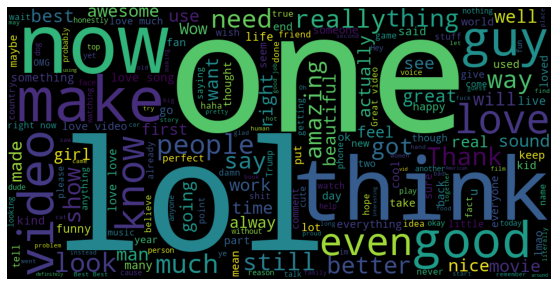

In [ ]:
k= (' '.join(df_positive['comment_text']))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

Its time to go for negative sentences

(-0.5, 999.5, 499.5, -0.5)

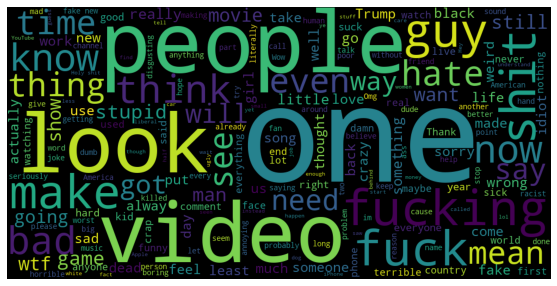

In [ ]:
df_negative = comm[comm.pol==-1]
k= (' '.join(df_negative['comment_text']))
wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

lets count the number of data with each type

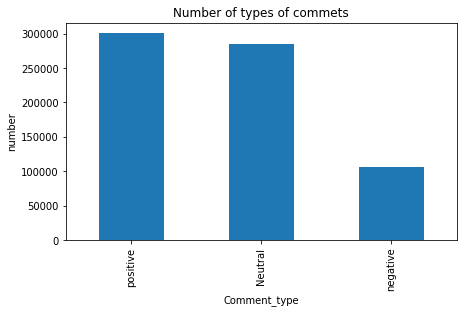

In [ ]:
comm['pol'].replace({1:'positive',0:'Neutral',-1:'negative'}).value_counts().plot(kind='bar',figsize=(7,4));
plt.title('Number of types of commets');
plt.xlabel('Comment_type');
plt.ylabel('number');

Lets generate the dataframe which has unique_id and the info about its comment

In [ ]:
id=[]
pos_comm=[]
neg_comm=[]
neutral_comm =[]
for i in set(comm.video_id):
    id.append(i)
    try:
        pos_comm.append(comm[comm.video_id==i].pol.value_counts()[1])
    except:
        pos_comm.append(0)
    try:    
        neg_comm.append(comm[comm.video_id==i].pol.value_counts()[-1])
    except:
        neg_comm.append(0)
    try:    
        neutral_comm.append(comm[comm.video_id==i].pol.value_counts()[0])
    except:
        neutral_comm.append(0) 

In [ ]:
df_unique = pd.DataFrame(id)
df_unique.columns=['id']
df_unique['pos_comm'] =pos_comm
df_unique['neg_comm'] = neg_comm
df_unique['neutral_comm'] = neutral_comm
df_unique['total_comments']=df_unique['pos_comm']+df_unique['neg_comm']+df_unique['neutral_comm']
df_unique.head(6)

,id,pos_comm,neg_comm,neutral_comm,total_comments
0,L87l9-2B0ug,30,28,42,100
1,OWAf0pD8354,112,29,59,200
2,_yt7xexSbfI,50,12,38,100
3,WFkhq40z348,29,7,20,56
4,EoejGgUNmVU,148,15,237,400
5,DdTamlcP-3Y,49,22,29,100


Storing this file for the EDA in another file

In [ ]:
# df_unique.to_csv('uniques.csv',index=False,)
# !cp uniques.csv "/content/drive/MyDrive/project"

Exploratory Data Analysis on videos file:

In [ ]:
videos.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


In [ ]:
comm.head()

,video_id,comment_text,likes,replies,pol
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


The data set is from 13.09 to 26.09. Total 14 days(2 week) Dataset

In [ ]:
videos.date.value_counts()

13.09    200
13.10    200
5.10     200
6.10     200
7.10     200
8.10     200
10.10    200
11.10    200
12.10    200
14.10    200
14.09    200
15.10    200
16.10    200
17.10    200
18.10    200
19.10    200
20.10    200
21.10    200
4.10     200
3.10     200
2.10     200
1.10     200
15.09    200
16.09    200
17.09    200
18.09    200
19.09    200
20.09    200
21.09    200
22.09    200
23.09    200
28.09    200
29.09    200
30.09    200
22.10    200
24.09    199
25.09    199
26.09    199
27.09    199
9.10     196
Name: date, dtype: int64

In [ ]:
print(videos.video_id.value_counts()[:10]) # these videos have become 7 times the most trending videos of these 2 weeks.
most_trending = videos.video_id.value_counts()[:10].index

Oo0NJsr5m4I    8
LunHybOKIjU    8
Hlt3rA-oDao    8
XpVt6Z1Gjjo    7
iALfvFpcItE    7
j5YSOabmFgw    7
OlI8r3nNUVw    7
oKzFGhlFqqE    7
bu9e410C__I    7
UXdbCReBTR8    7
Name: video_id, dtype: int64


In [ ]:
videos[videos.video_id=='LunHybOKIjU']

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
5592,LunHybOKIjU,Eminem Rips Donald Trump In BET Hip Hop Awards...,BETNetworks,24,BET|BET Networks|BET Music|Black Entertainment...,2241127,120959,13250,41629,https://i.ytimg.com/vi/LunHybOKIjU/default.jpg,11.1
5792,LunHybOKIjU,Eminem Rips Donald Trump In BET Hip Hop Awards...,BETNetworks,24,BET|BET Networks|BET Music|Black Entertainment...,18150878,567710,85986,199399,https://i.ytimg.com/vi/LunHybOKIjU/default.jpg,12.1
5992,LunHybOKIjU,Eminem Rips Donald Trump In BET Hip Hop Awards...,BETNetworks,24,BET|BET Networks|BET Music|Black Entertainment...,24786774,780500,127204,265461,https://i.ytimg.com/vi/LunHybOKIjU/default.jpg,13.1
6204,LunHybOKIjU,Eminem Rips Donald Trump In BET Hip Hop Awards...,BETNetworks,24,BET|BET Networks|BET Music|Black Entertainment...,28212358,870122,153018,296958,https://i.ytimg.com/vi/LunHybOKIjU/default.jpg,14.1
6431,LunHybOKIjU,Eminem Rips Donald Trump In BET Hip Hop Awards...,BETNetworks,24,BET|BET Networks|BET Music|Black Entertainment...,30224787,916296,166986,314704,https://i.ytimg.com/vi/LunHybOKIjU/default.jpg,15.1
6672,LunHybOKIjU,Eminem Rips Donald Trump In BET Hip Hop Awards...,BETNetworks,24,BET|BET Networks|BET Music|Black Entertainment...,31636010,950353,175483,327345,https://i.ytimg.com/vi/LunHybOKIjU/default.jpg,16.1
6917,LunHybOKIjU,Eminem Rips Donald Trump In BET Hip Hop Awards...,BETNetworks,24,BET|BET Networks|BET Music|Black Entertainment...,32512343,968719,180427,332396,https://i.ytimg.com/vi/LunHybOKIjU/default.jpg,17.1
7135,LunHybOKIjU,Eminem Rips Donald Trump In BET Hip Hop Awards...,BETNetworks,24,BET|BET Networks|BET Music|Black Entertainment...,33191594,982842,184310,337603,https://i.ytimg.com/vi/LunHybOKIjU/default.jpg,18.1


Lets analyse which video was most trending of this time.

In [ ]:
for i in most_trending:
    info =videos[videos.video_id== i][['title','channel_title','views','likes','dislikes','comment_total']].tail(1)# get the last row of the dataframe(title, like,views,dislikes)
    print(info)
    print('****************************************************************************************')

                                                  title channel_title  \
7184  Tourist terrified by new glass walkway that cr...          CGTN   

        views  likes  dislikes  comment_total  
7184  5145601  38234      7372           6861  
****************************************************************************************
                                                  title channel_title  \
7135  Eminem Rips Donald Trump In BET Hip Hop Awards...   BETNetworks   

         views   likes  dislikes  comment_total  
7135  33191594  982842    184310         337603  
****************************************************************************************
                title        channel_title    views   likes  dislikes  \
7982  Kellywise - SNL  Saturday Night Live  6845621  132302      8213   

      comment_total  
7982           9309  
****************************************************************************************
                                                  ti

(-0.5, 999.5, 499.5, -0.5)

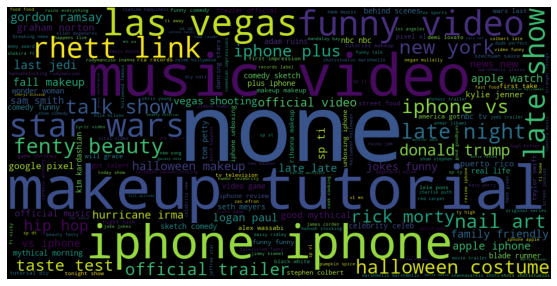

In [ ]:
# splitting the tags
tags = videos['tags'].map(lambda k: k.lower().split('|')).values 
 
# joining and making a complete list
k= (' '.join(videos['tags']))  
wordcloud = WordCloud(width = 1000, height = 500).generate((' '.join(k.lower().split('|'))))# word cloud
 
 
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

Tags like Makeup,iphone,tutorial,beauty are the most common among all

Now its time to see which of the channel among all is best

In [ ]:
videos.columns

Index(['video_id', 'title', 'channel_title', 'category_id', 'tags', 'views',
       'likes', 'dislikes', 'comment_total', 'thumbnail_link', 'date'],
      dtype='object')

In [ ]:
df1 =pd.DataFrame(videos.channel_title.value_counts())
df1.columns=['times channel got trending']# how many times the channel got trending'
df1.head(6)

,times channel got trending
Vox,40
Jimmy Kimmel Live,40
First We Feast,39
vlogbrothers,38
jacksfilms,38
The Tonight Show Starring Jimmy Fallon,38


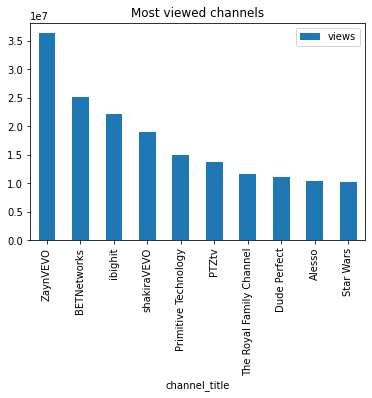

In [ ]:
df_channel =pd.DataFrame(videos.groupby(by=['channel_title'])['views'].mean()).sort_values(by='views',ascending=False)
df_channel.head(10).plot(kind='bar');
plt.title('Most viewed channels');

Inference -The Zayn is mostly viewed channel among all !

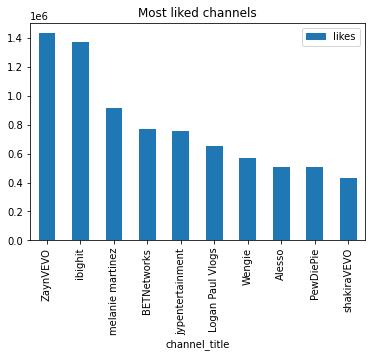

In [ ]:
df_channel =pd.DataFrame(videos.groupby(by=['channel_title'])['likes'].mean()).sort_values(by='likes',ascending=False)
df_channel.head(10).plot(kind='bar');
plt.title('Most liked channels');

Inference -Zayn vevo also leads for the mostly liked vidoes

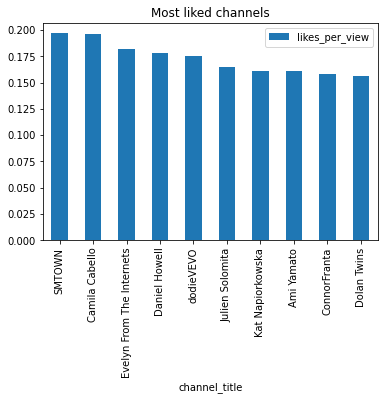

In [ ]:
videos['likes_per_view']=videos['likes']/videos['views']
df_channel =pd.DataFrame(videos.groupby(by=['channel_title'])['likes_per_view'].mean()).sort_values(by='likes_per_view',ascending=False)
df_channel.head(10).plot(kind='bar');
plt.title('Most liked channels');

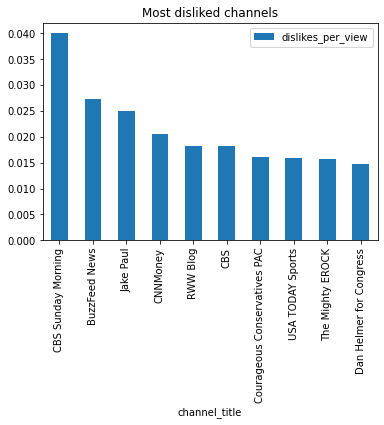

In [ ]:
videos['dislikes_per_view']=videos['dislikes']/videos['views']
df_channel =pd.DataFrame(videos.groupby(by=['channel_title'])['dislikes_per_view'].mean()).sort_values(by='dislikes_per_view',ascending=False)
df_channel.head(10).plot(kind='bar');
plt.title('Most disliked channels');

Videos which are disliked among all
CBS Subday morning seems to be pretty boring channel

Now import the Unique file created in sentimental analysis section

In [ ]:
unique = pd.read_csv("/content/drive/MyDrive/YouTube/unique.csv")

In [ ]:
unique.sort_values(by='pos_comm',ascending=False).head(5)

,id,pos_comm,neg_comm,neutral_comm,total_comments
1790,eERPlIdPJtI,426,32,142,600
2238,Zmi9iQp6944,411,55,34,500
499,udnGW3E1vxY,404,51,242,697
1898,xTyTQgb-y-A,401,40,127,568
748,zKriLekFPwg,399,46,255,700


In [ ]:
videos[videos.video_id == 'eERPlIdPJtI'].title[225]

'Weight Update: 6 weeks Post Surgery! 93 pounds!'

Inference- Mostly 'Weight Update: 6 weeks Post Surgery! 93 pounds!' have very large number of positive reviews

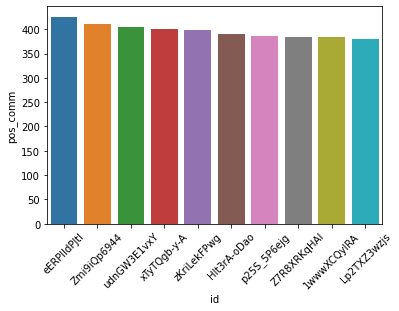

<Figure size 360x288 with 0 Axes>

In [ ]:
sns.barplot(data=unique.sort_values(by='pos_comm',ascending=False).head(10),x='id',y='pos_comm')
plt.xticks(rotation=45);
plt.figure(figsize=(5,4));

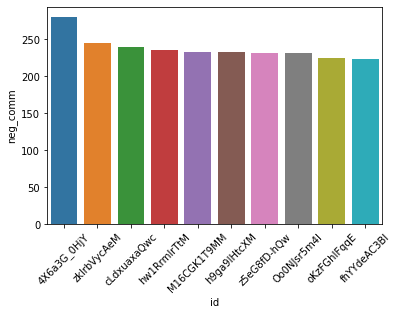

<Figure size 360x288 with 0 Axes>

In [ ]:
sns.barplot(data=unique.sort_values(by='neg_comm',ascending=False).head(10),x='id',y='neg_comm')
plt.xticks(rotation=45);
plt.figure(figsize=(5,4));

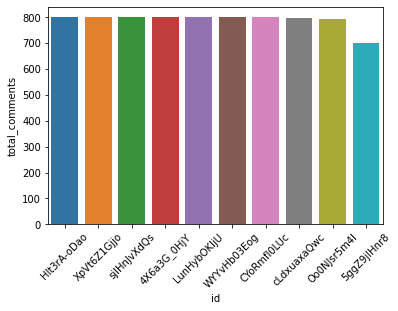

<Figure size 360x288 with 0 Axes>

In [ ]:
sns.barplot(data=unique.sort_values(by='total_comments',ascending=False).head(10),x='id',y='total_comments')
plt.xticks(rotation=45);
plt.figure(figsize=(5,4));

Lets find out the relation among continuous variables
As quite obvious the number of likes have very strong relation with views

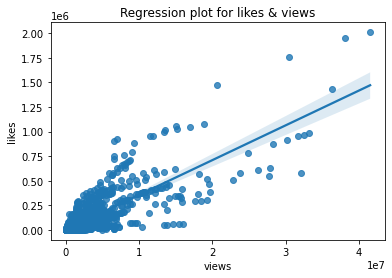

In [ ]:
sns.regplot(data=videos,x='views',y='likes');
plt.title("Regression plot for likes & views");

Number of dislikes are related but the relation is not as much strong.

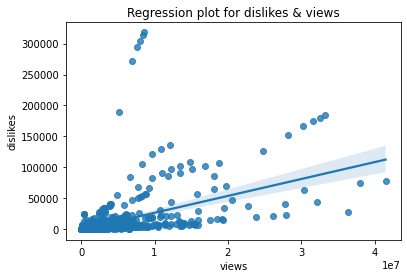

In [ ]:
sns.regplot(data=videos,x='views',y='dislikes');
plt.title("Regression plot for dislikes & views");

Correlation matrix is the evidence of above analysis!

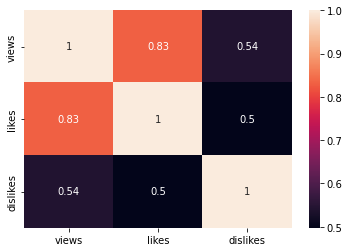

In [ ]:
df_corr = videos[['views','likes','dislikes']]

sns.heatmap(df_corr.corr(),annot=True)

##Prediction

predicting likes, based on views, using Simple LInear regression

In [ ]:
x=videos.iloc[:,5:6]
y=videos.iloc[:,6]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)

In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
x_test

,views
5091,2468747
3294,2431478
6629,1156632
1775,110528
1633,734401
...,...
3788,3619723
5625,33165
5387,73789
2148,2935645


In [ ]:
y_pred[2]

42359.13872565775

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test,y_pred)

0.6167846903590144

In [ ]:
lr.score(x_train,y_train)

0.7146888210501648